In [17]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
X = data.drop(columns=['MEDV'])
y = data['MEDV']

## Return all Principal Components

In [11]:
pca = PCA(n_components = X.shape[1])
X_new = pca.fit_transform(X)

In [13]:
# How much of the variance in the underlined data is captured in each principal component
print(pca.explained_variance_ratio_)
# Sum should be 1
print(sum(pca.explained_variance_ratio_))

[8.05823175e-01 1.63051968e-01 2.13486092e-02 6.95699061e-03
 1.29995193e-03 7.27220158e-04 4.19044539e-04 2.48538539e-04
 8.53912023e-05 3.08071548e-05 6.65623182e-06 1.56778461e-06
 7.96814208e-08]
1.0


## Visualize the Principal Components' Explained Variance

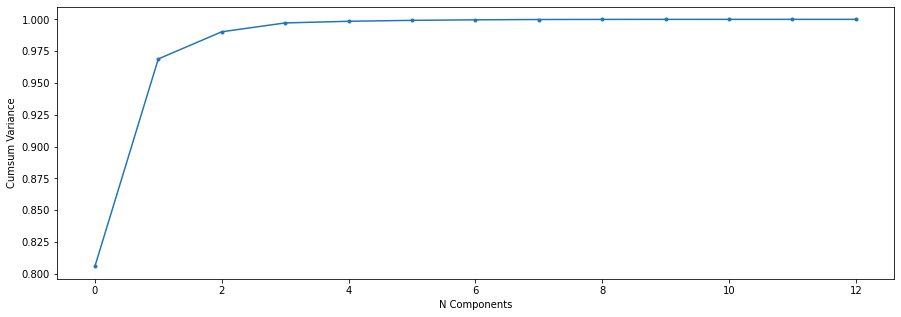

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='.')
plt.xlabel('N Components')
plt.ylabel('Cumsum Variance');

We observe a "knee" at the 5+ component.

## Build models for different PCA n_components

In [74]:
def build_model(regression_fn,
                target,
                features,
                dataset,
                n_components,
                use_pca):
    
    X = dataset[features]
    y = dataset[target]
    
    if use_pca is True:
        pca = PCA(n_components = n_components)
        X_new = pca.fit_transform(X)
    else:
        X_new = X
        pca = None
    
    x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)
    
    model = regression_fn.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    return {
        'x_initial': X,
        'x_transform': X_new,
        'x_train': x_train,
        'x_test': x_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'pca': pca,
        'model': model
    }

## Model Score with raw features

In [75]:
res = build_model(LinearRegression(),
                 'MEDV',
                 data.drop(columns=['MEDV']).columns,
                 data,
                 10,
                 False)
r2_score(res['y_test'], res['y_pred'])

0.589222384918251

## Model Scores with Various numbers of Principal Components

In [98]:
for i in range (1, data.drop(columns=['MEDV']).shape[1]):
    res = build_model(LinearRegression(),
                     'MEDV',
                     data.drop(columns=['MEDV']).columns,
                     data,
                     i,
                     True)
    print(f"Score for {i} componenets:", r2_score(res['y_test'], res['y_pred']))

Score for 1 componenets: 0.047162836623686366
Score for 2 componenets: 0.0504633836140983
Score for 3 componenets: 0.03942337234001625
Score for 4 componenets: 0.03493174298753787
Score for 5 componenets: 0.05106060532726464
Score for 6 componenets: 0.4168957229978084
Score for 7 componenets: 0.41964130510958153
Score for 8 componenets: 0.456809029909263
Score for 9 componenets: 0.46354495255504247
Score for 10 componenets: 0.4926671919451382
Score for 11 componenets: 0.5558962810380778
Score for 12 componenets: 0.5620956634521224


## Plots first 2 components

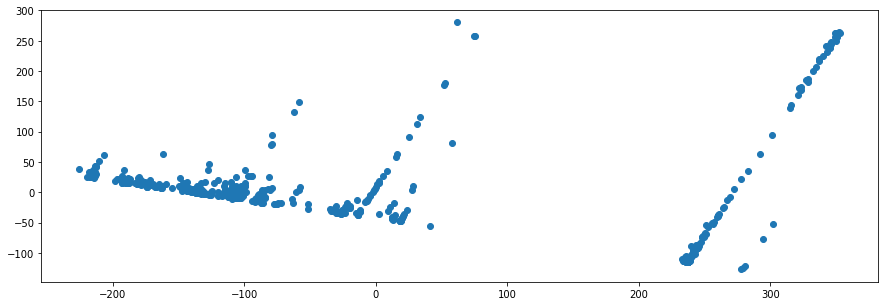

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(res['x_transform'].transpose()[0], res['x_transform'].transpose()[1]);